# Machine Learning I, Programming Exercise 10

## 1. Principal Component Analysis
The goal of PCA is to linearly project data from a high dimensional space $\mathbb{R}^D$ to a $d$-dimensional subspace s.t. the distance between original and projected points is minimal. Mathematically speaking, we have a data matrix $X := \left(\begin{matrix} \mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \ldots & \mathbf{x}^{(n)} \end{matrix}\right) \in \mathbb{R}^{D\times n}$ and we want to find a projection matrix $W := \left(\begin{matrix} \mathbf{w}_1 & \mathbf{w}_2 & \ldots & \mathbf{w}_d \end{matrix}\right) \in \mathbb{R}^{D \times d}$ that maximizes the objective
\begin{align*}
    W^* = \operatorname{arg\ max}_{W \in \mathbb{R}^{D \times d}} &\sum_{j=1}^{d} \mathbf{w}_j^T XX^T \mathbf{w}_j\\
    \text{subject to } &\langle \mathbf{w}_i, \mathbf{w}_j \rangle = \begin{cases} 1 & \text{if } i=j \\ 0 & \text{otherwise}\end{cases}
\end{align*}

In the lecture, we have seen that the solution to this optimization problem is given by choosing the $\mathbf{w}_j$ as the normalized eigenvectors of the scatter matrix $S = XX^T$ corresponding to the $d$ largest eigenvalues. Since there are algorithms that compute the eigenvalues and vectors of a matrix, we can use those to find a solution to the PCA problem. However, this is not always the best option, and in this exercise we also want to take a look at some alternatives:
1. Implement the function `pca_eig(X, d)` that takes `X` as a Numpy array of shape `(N, D)` and returns the PCA solution $W^*$ as a Numpy array of shape `(D, d)`. You can make use of the function [`numpy.linalg.eigh`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) to compute the eigenvectors of $S$.


2. For every matrix $M \in \mathbb{R}^{a \times b}$, we can find orthogonal matrices $U \in \mathbb{R}^{a \times k}, V \in \mathbb{R}^{b \times k}$ and a diagonal matrix $\Sigma = \operatorname{diag}(\sigma_1, \sigma_2, \ldots, \sigma_k) \in \mathbb{R}^{k \times k}$ with
\begin{equation*}
    M = U \Sigma V^T,
\end{equation*}
where $k = \min(a, b)$. This factorisation is called [*Singular Value Decomposition*](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD) and the $\sigma_i$ are called *singular values*, while the columns of $U$ and $V$ are called left and right singular vectors, respectively. Note that this looks quite similar to the eigendecomposition of a real, symmetric matrix, but SVD can be applied to non-symmetric or even non-square matrices as well.

   It is possible to compute $U, V$ and $\Sigma$ when given a matrix $M$, for example, Numpy offers the [`numpy.linalg.svd`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) function. Use this to implement the `pca_svd` function where you should find the PCA solution without computing any eigenvectors of $S = XX^T$ explicitely.


3. Yet another possibility to compute the (linear) PCA solution, that is especially useful when $D > n$, is hinted at in the lecture slides about kernel PCA. Implement this "trick" in the `pca_trick` function and return the PCA solution $W^*$, like in the previous two functions. **Hint:** Make sure that the columns of your solution $W^*$ are normalized.


4. Granted that they were correctly implemented, each of the three solvers should have different runtime characteristics. In this exercise, we want to explore how the runtime scales with the number of data points $n$ and the dimensionality of the data $D$. Therefore, you should fix $d=5, n=1000$ and run the three different PCA solvers on data returned by the `generate_data` function for $D \in \{10, 100, 1000, 10000\}$. Measure the time that each function takes (e.g. using [`time.perf_counter()`](https://docs.python.org/3/library/time.html#time.perf_counter)) and create a plot with the values of $D$ on the x-axis and the elapsed time on the $y$-axis. Make another plot, where you fix $D=1000$ and choose $n \in \{10, 100, 1000, 10000\}$.

**Hint:** If you want to check whether your implementations return the correct $W^*$, you can compute the reconstruction or re-projection error for every point in the dataset. Due to the way the dataset is constructed, this error should be 0 for all points. Also, keep in mind that you need to center the data before applying PCA.

Running PCA for D=10 and n=1000...
Took 0.00887 seconds.
MSE X: 0.0000
Running PCA (dimension trick) for D=10 and n=1000...
Took 0.20206 seconds.
MSE X: 0.0000
Running PCA (SVD trick) for D=10 and n=1000...
Took 0.02777 seconds.
MSE X: 0.0000
Running PCA for D=100 and n=1000...
Took 0.00257 seconds.
MSE X: 0.0000
Running PCA (dimension trick) for D=100 and n=1000...
Took 0.18663 seconds.
MSE X: 0.0000
Running PCA (SVD trick) for D=100 and n=1000...
Took 0.17034 seconds.
MSE X: 0.0000
Running PCA for D=1000 and n=1000...
Took 0.16824 seconds.
MSE X: 0.0000
Running PCA (dimension trick) for D=1000 and n=1000...
Took 0.19237 seconds.
MSE X: 0.0000
Running PCA (SVD trick) for D=1000 and n=1000...
Took 0.41863 seconds.
MSE X: 0.0000
Running PCA for D=10000 and n=1000...
Took 173.44761 seconds.
MSE X: 0.0000
Running PCA (dimension trick) for D=10000 and n=1000...
Took 0.59593 seconds.
MSE X: 0.0000
Running PCA (SVD trick) for D=10000 and n=1000...
Took 30.28097 seconds.
MSE X: 0.0000
Running

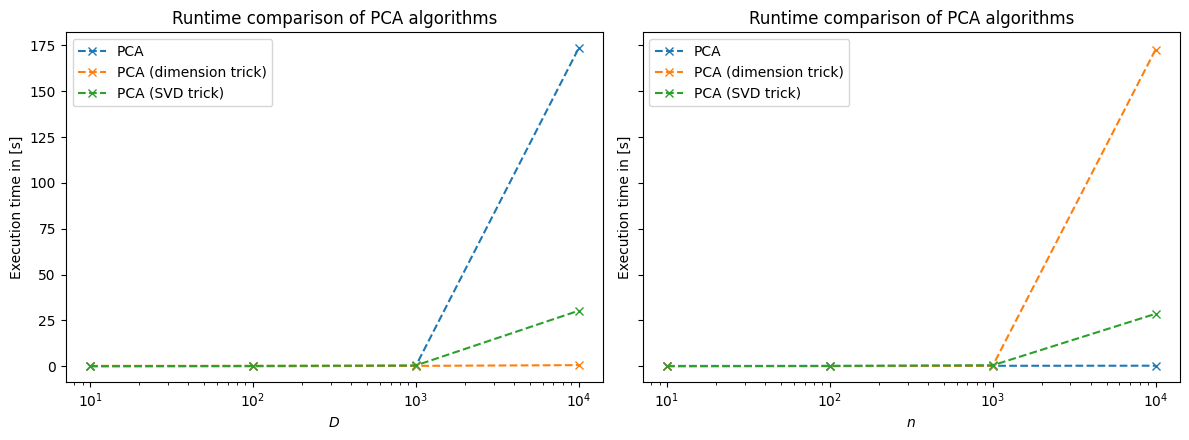

In [7]:
%matplotlib inline
import time

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


def pca_eig(X, d):
    # X is assumed to be centered already

    # compute Eigenvectors of the scatter matrix
    S = np.matmul(X.T, X)
    eigvals, eigvecs = np.linalg.eigh(S)
    # The Eigenvectors are ordered according to their eigenvalues in ascending order.
    # Hence, we just have to pick the last d columns from u
    W = eigvecs[:, -d:]
    return W
    
def pca_svd(X, d):
    U, S, VT = np.linalg.svd(X)
    # The Singular vectors are ordered according to their singular values in descending order.
    # Hence, we just have to pick the first d rows from v^T 
    # Achtung in den Zeilen stehen die transponierten EV
    W = np.ascontiguousarray(VT[:d].T)
    return W

    
def pca_trick(X, d):
    #useful in the case d > N
    # X is assumed to be centered already

    # compute Eigenvectors of X^TX instead of the scatter matrix
    S = np.matmul(X, X.T)
    eig, u = np.linalg.eigh(S)
    # The Eigenvectors are ordered according to their eigenvalues in ascending order.
    # Hence, we just have to pick the last d columns from u
    W = u[:, -d:]
    eig = eig[-d:]
    # And to transform them into the correct space, we have to multiply by X again
    W = np.matmul(X.T, W)

    # Note that the resulting columns of W_hat are not normalized. Hence we divide by the norm
    # (in this case the square root of the corresponding eigenvalue)
    np.sqrt(eig, out=eig)
    np.divide(W, eig, out=W)
    
    return W

def generate_data(d, D, n, d_noise=0, random_state=None):
    X, Y = make_classification(n, n_features=D, n_informative=d, n_redundant=D-d-d_noise, n_classes=3, 
                               n_clusters_per_class=1, class_sep=1.5, random_state=random_state)
    return X
    
ALGORITHMS = {'PCA': pca_eig, 'PCA (dimension trick)': pca_trick, 'PCA (SVD trick)': pca_svd}

def run_pca(d, D, n):
    X = generate_data(d, D, n)
    times = []

    # TODO: Run the algorithms on X and time them

    return times


# Performance Tuning for MKL
# Comment the following lines if your numpy version is not using MKL
#import mkl
#import multiprocessing as mp
#mkl.set_num_threads_local(mp.cpu_count())
#print('Threads:', mkl.get_max_threads())

ALGORITHMS = {'PCA': pca_eig, 'PCA (dimension trick)': pca_trick, 'PCA (SVD trick)': pca_svd}

def run_pca(d, D, n):
    X = generate_data(d, D, n)
    times = []

    # We must first center the data!
    mean = np.mean(X, axis=1, keepdims=True)
    np.subtract(X, mean, out=X)

    for name, alg in ALGORITHMS.items():
        print(f'Running {name:s} for D={D:d} and n={n:d}...')
        start = time.perf_counter()
        W = alg(X, d)
        end = time.perf_counter()
        times.append(end - start)
        print(f'Took {times[-1]:.5f} seconds.')
        
        X_hat = (X @ W) @ W.T
        mse = np.mean((X-X_hat)**2)
        print(f'MSE X: {mse:.4f}')

    return times


# Performance Tuning for MKL
# Comment the following lines if your numpy version is not using MKL
#import mkl
#import multiprocessing as mp
#mkl.set_num_threads_local(mp.cpu_count())
#print('Threads:', mkl.get_max_threads())

# Run PCA for different values of D
times = []
params = [dict(n=1000, d=5, D=D_) for D_ in [10, 100, 1000, 10000]]
params += [dict(n=n_, d=5, D=1000) for n_ in [10, 100, 1000, 10000]]
for param in params:
    res = run_pca(**param)
    times.append(res)

def plot_performance(ax, params, times, variable):
    ax.set_xscale('log')
    ax.set_title('Runtime comparison of PCA algorithms')
    ax.set_xlabel(f'${variable:s}$')
    ax.set_ylabel('Execution time in [s]')
    for i, (name, alg) in enumerate(ALGORITHMS.items()):
        x = [param[variable] for param in params]
        y = [t[i] for t in times]
        ax.plot(x, y, marker='x', linestyle='dashed', label=name)
    ax.legend()

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4.5))
plot_performance(axes[0], params[:len(params)//2], times[:len(times)//2], 'D')
plot_performance(axes[1], params[len(params)//2:], times[len(times)//2:], 'n')
fig.tight_layout()
plt.show()
plt.close(fig)

## 2. Autoencoders
In the lecture, *autoencoders* have been introduced as the neural network approach to dimensionality reduction. Usually, an autoencoder consists of two parts: an *encoder* that procuces a compressed *code* when given an input and a *decoder* that tries to reconstruct the original input from a given code. Concatenating those two operations yields the complete autoencoder. In most cases, the code produced by the encoder has a much lower dimensionality than the original input. In this exercise, we want to implement such an autoencoder, train it on face images and finally examine the code representation that the autoencoder learned.

1. Define the autoencoder architecture in the `Autoencoder` class. The `encode` method should take a batch of 32 by 32 pixel gray-scale images (tensor of size `(B, 1, 32, 32)`) and transform it into a code of size `(B, 1, 8, 8)` or any other shape that amounts to 64 elements per instance. The `decode` method should take such a code and transform it back to a 32 by 32 pixel gray-scale image. We don't want to specify an exact architecture for you to implement and instead encourage you to experiment with that, but if you want, you can take the following as a starting point:

   Encoder:
    * 3x3 conv., 16 filters
    * ReLU
    * 2x2 max pool
    * 3x3 conv., 32 filters
    * ReLU
    * 2x2 max pool
    * 3x3 conv., 16 filters
    * ReLU
    * 3x3 conv., 1 filter
    
   Decoder:
    * 3x3 conv., 16 filters
    * ReLU
    * 3x3 conv., 32 filters
    * ReLU
    * 2x2 [Upsampling](https://pytorch.org/docs/stable/nn.html#upsample), bilinear
    * 3x3 conv., 16 filters
    * ReLU
    * 2x2 [Upsampling](https://pytorch.org/docs/stable/nn.html#upsample), bilinear
    * 1x1 cov., 1 filter
    * Sigmoid
   
   Note that all convolutions should use padding s.t. the output has the same spatial size as the input. The sigmoid activation at end of the decoder ensures that each pixel is in the valid range of $[0, 1]$.
   

2. Train your autoencoder on the [LFW](https://scikit-learn.org/stable/datasets/index.html#labeled-faces-in-the-wild-dataset) dataset for 15 epochs and plot the first 10 images of the dataset together with the reconstructions obtained when passing them through the autoencoder. Re-use your (or the sample solution's) code from the previous programming exercises for that, but make sure that you change the loss to [`MSELoss`](https://pytorch.org/docs/stable/nn.html#mseloss) and use the input as the target. **Hint:** If there seems to be no progress during training, try using SGD with *momentum* or switch to a different optimizer (e.g., [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam))

3. Now we want to examine the representation that the autoencoder came up with during training. For that, please follow these steps:
    1. Use the trained autoencoder's `encode` method to retrieve the code for all images in the test set `X_test`. Reshape this tensor to size `(N, 64)` and call it $Z$.
    2. Compute the first two principal components of $Z$, let's call them $v_1$ and $v_2$ and the corresponding eigenvalues $\lambda_1$ and $\lambda_2$. Remember to center the data before applying PCA!
    3. Create a grid $G$ of size 9 by 9. At position $(i, j)$ the grid should contain the vector
    \begin{equation*}
        G[i, j] = \mu + (i-4)s_1\sqrt{\lambda_1}v_1 + (j-4)s_2\sqrt{\lambda_2}v_2,
    \end{equation*}
    where $\mu = \frac{1}{N} \sum_{z \in Z} z$, i.e., the mean code, while $s_1$ and $s_2$ are scaling factors that you can choose by experimenting. Start with a small value and increase it until your results start looking bad.
    4. Pass each vector in the grid $G$ through the autoencoder's `decode` function and plot the resulting image at the correct grid position. Can you assign some semantic meaning to the first two principal components after looking at the plots?

In [ ]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split


class Autoencoder(torch.nn.Module):
    def __init__(self, activation='relu', in_channels=3):
        super(Autoencoder, self).__init__()
        
        self.activation = activation
        
        # TODO: define layers
    
    def encode(self, x):
        raise NotImplementedError('TODO')

    def decode(self, x):
        raise NotImplementedError('TODO')
    
    def forward(self, x):
        z = self.encode(x)
        return self.decode(z)


def train_model(network, loss, optimizer, train_iter, val_iter, num_epochs, device='cpu', start_epoch=0,
                checkpoints=False, out_dir=None):
    # TODO: copy this from your (or the sample solution's) previous exercises.
    # You might need to adapt a few things here and there, since training an autoencoder
    # is not a classifiaction task
    raise NotImplementedError('TODO')


def plot_code_pca(Z, network):
    # TODO: compute top2 PCs of Z , generate and plot the grid as described in the exercise
    raise NotImplementedError('TODO')


# Folder to download the dataset to. None means ~/scikit_learn_data/lfw_home/.
# Note that about 300MB of storage space are needed for the dataset
download_dir = None
lfw_people = fetch_lfw_people(resize=0.341, slice_=(slice(85, 179, None), slice(78, 172, None)))
X = lfw_people.images / 255
X_train, X_test = train_test_split(X, test_size=0.25, random_state=1234)
X_train = torch.from_numpy(X_train).to(torch.float32).unsqueeze(-3)
X_test = torch.from_numpy(X_test).to(torch.float32).unsqueeze(-3)

# Change this to 'cuda' if you can and want to use a GPU for training
# Otherwise, you can completely ignore this parameter
device = torch.device('cpu')
batch_size = 64
num_epochs = 15
num_workers = 0  # You can use multiple processes to load the data. 0 means that everything is done in the same process
step_size = 1e-3
regularization=0.0  # Contols how much the Frobenius norm of the parameters contributes to the final loss
checkpoints = True  # Save the model after each epoch of training
out_dir = 'models'  # Folder, where your model checkpoints will be saved
load_path = None  # Don't train the model, but load it from the specified file instead
data_dir = 'data'  # Folder that contains the dataset. If it is not present, 
                   # the dataset will be downloaded into that folder

# Load the training and the test dataset and wrap them in a DataLoader
is_cuda = device.type == 'cuda'
train_dataset = torch.utils.data.TensorDataset(X_train, X_train)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                                    num_workers=num_workers, pin_memory=is_cuda)
val_dataset = torch.utils.data.TensorDataset(X_test, X_test)
val_iter = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True,
                                    num_workers=num_workers, pin_memory=is_cuda)

# Instantiate the network
activation=torch.nn.ReLU()
network = Autoencoder(activation=activation, in_channels=1)
network = network.to(device)
loss = torch.nn.MSELoss().to(device)
optimizer = torch.optim.SGD(network.parameters(), lr=step_size, weight_decay=regularization)

start_epoch = 0

if load_path is not None:
    # Load model, optimizer state and history 
    state_dict = torch.load(load_path)
    network.load_state_dict(state_dict['model'])
    optimizer.load_state_dict(state_dict['opt'])
    start_epoch = state_dict['epoch']+1
    history = state_dict['history']
else:
    # Otherwise, we train the model for the specified number of epochs
    history = train_model(network, loss, optimizer, train_iter, val_iter, num_epochs, device,
                      start_epoch, checkpoints=checkpoints, out_dir=out_dir)


n_plots = 10
# TODO: plot reconstructions

# TODO: plot reconstructed grid
# plot_code_pca(Z, network)


ValueError: optimizer got an empty parameter list